In [42]:
import tensorflow as tf
import glob
import os

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

train_dir = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_train\*.png"))
seg_train_dir = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_seg_train\*.png"))

test_dir = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_test\*.png"))
seg_test_dir = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_seg_test\*.png"))

val_dir = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_validate\*.png"))
seg_val_dir = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_seg_validate\*.png"))

In [99]:
train = tf.data.Dataset.from_tensor_slices((train_dir, seg_train_dir))
test = tf.data.Dataset.from_tensor_slices((test_dir, seg_test_dir))
val = tf.data.Dataset.from_tensor_slices((val_dir, seg_val_dir))

train = train.shuffle(len(train_dir))
test = test.shuffle(len(test_dir))
val = val.shuffle(len(val_dir))

def decode_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels = 1)
    img = tf.image.resize(img, (256,256))
    return img

def process_path(img_path, mask_path):
    img = decode_img(img_path)
    img = tf.cast(img, tf.float32) / 255.0
    
    mask = decode_img(mask_path)
    mask = mask == [0, 85, 170, 255]
    mask = tf.cast(mask, tf.int32)
    return img, mask

train = train.map(process_path)
test = test.map(process_path)
val = val.map(process_path)

tf.Tensor([0 0 1 0], shape=(4,), dtype=int32)


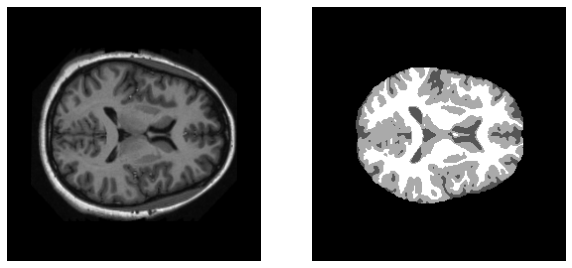

In [108]:
import matplotlib.pyplot as plt 

def display(images):
    plt.figure(figsize=(10,10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap = 'gray')
        plt.axis('off')
    plt.show()
    
for img, mask in train.take(1):
    display([tf.squeeze(img), tf.argmax(mask, axis = -1)])